In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read sales data into a dataframe
df = pd.read_csv('RestaurantSales.csv')

In [3]:
# view top 5 entry values
df.head()

,Date,Sales
0,05/02/2021,33100
1,06/02/2021,36800
2,07/02/2021,48600
3,08/02/2021,31900
4,09/02/2021,28500


In [4]:
# check attribute datatypes
df.dtypes

Date     object
Sales     int64
dtype: object

In [5]:
# convert Date column to datetime type
df['Date']= pd.to_datetime(df['Date'], format = '%d/%m/%Y')

In [6]:
df.dtypes

Date     datetime64[ns]
Sales             int64
dtype: object

In [7]:
# check number of rows and columns present
df.shape

(92, 2)

The data contains 92 rows and 2 columns.

In [8]:
# df summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    92 non-null     datetime64[ns]
 1   Sales   92 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


Columns Date and Sales contain no missing values and are in the datetime and integer datatypes respectively.

In [9]:
# statistical summary
df.describe()

,Sales
count,92.000000
mean,45223.369565
std,18625.494242
min,10000.000000
25%,30687.500000
50%,42400.000000
75%,57275.000000
max,92200.000000


* There are 92 records of sales i.e a record of almost 4 month sales
* An average total sale of approximately 45,223 by the Restaurant
* Minimum sale is 10,000 
* 75% of the sales data is about 57,275
* Highest Sale recoreded for the months is 92,200.

In [10]:
# last rows of data
df.tail()

,Date,Sales
87,2021-05-03,32400
88,2021-05-04,26150
89,2021-05-05,39600
90,2021-05-06,22000
91,2021-05-07,48450


Above shows that the record of Sales ends at the fifth month. It started at the second month according to head() function

In [11]:
# extract Day, Month and Year features from Date
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [12]:
# view df.head()
df.head()

,Date,Sales,Day,Month,Year
0,2021-02-05,33100,5,2,2021
1,2021-02-06,36800,6,2,2021
2,2021-02-07,48600,7,2,2021
3,2021-02-08,31900,8,2,2021
4,2021-02-09,28500,9,2,2021


### Visuals of the data

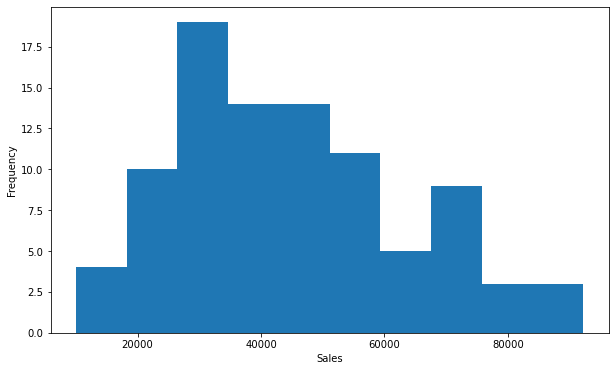

In [13]:
# histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Sales'])
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:xlabel='Date', ylabel='Sales'>

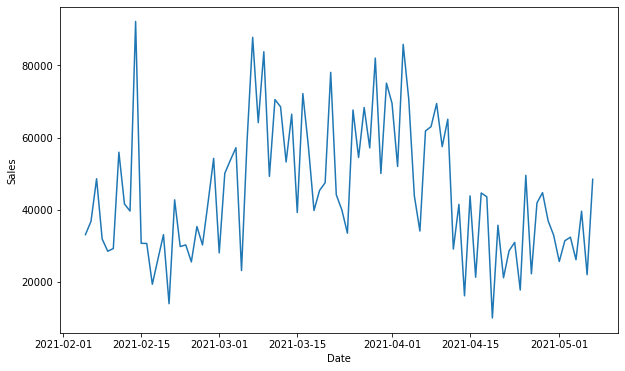

In [15]:
# lineplot of Sales by Date to view trend and seasonality of the data
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Sales', data=df)

The data does not tend to follow a seasonal pattern or trend.

[Text(0.5, 1.0, 'Monthly sales distribution')]

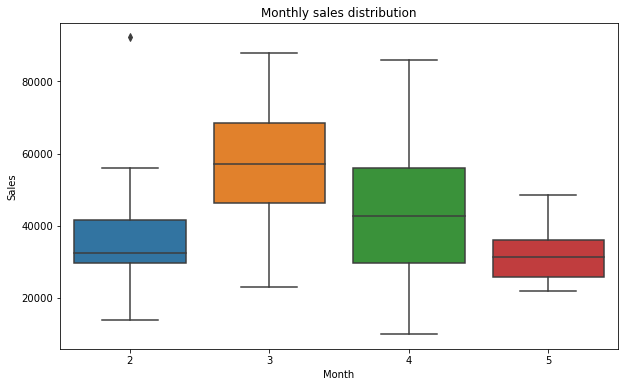

In [16]:
# boxplot of monthly sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Sales', data=df).set(title='Monthly sales distribution')

Highest sales record is seen to be in March; the third month. There is an extreme Sale in the second month.
* There wasn't much sales at the initial start of the Restaurant and the highest sales made is almost 60,000 and lowest recorded below 20,000.
* The Restaurant made made better sales compared to its start, having its maximum sale of of above 80,000 and minimum slightly below 20,000
* The fourth month, following the pattern is meant to have better sales than the previous month; but this is false.  The minimum sales for this month is lower than least sales of opening. This might be due to the Ramadan season.
* Conclusions for the fifth month can not be made just yet as it contains incomplete date. Although, the minimum sales yet, has an improvement.

<AxesSubplot:xlabel='Day', ylabel='Sales'>

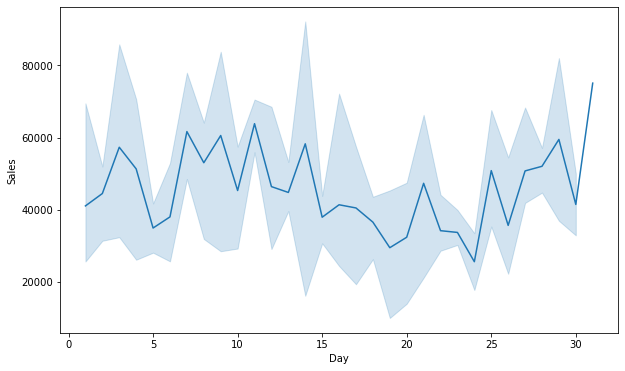

In [17]:
# Line plot of daily sales
plt.figure(figsize=(10, 6))
sns.lineplot(x='Day', y='Sales', data=df)

In [18]:
# set index variable as Date
df = df.set_index('Date')
# define train and test variables for modelling
X = df.loc[:'2021-04-29']
y = df.loc['2021-04-30':]

In [19]:
df.head()

,Sales,Day,Month,Year
Date,,,,
2021-02-05,33100,5,2,2021
2021-02-06,36800,6,2,2021
2021-02-07,48600,7,2,2021
2021-02-08,31900,8,2,2021
2021-02-09,28500,9,2,2021


In [20]:
# split into train and test sets
X_train = X.drop(['Month', 'Sales','Day'], axis=1)
y_train = X['Sales'].values

X_test = y.drop(['Month', 'Sales', 'Day'], axis=1)
y_test = y['Sales'].values

In [21]:
# import LinearRegression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train) # fit model
pred = model.predict(X_test)

In [22]:
# import metrics and print performance of model
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test,pred))
print('MSE: ', metrics.mean_squared_error(y_test,pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE:  14633.035714285716
MSE:  262687609.83560097
RMSE:  16207.640477120689


Model isn't doing too good, the RMSE is too high. Let us try cross validating

In [23]:
# more imports from sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

model2 = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model2, X_train, y_train, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

In [24]:
print('MAE: ', np.mean(np.absolute(scores)))
print('MSE: ', np.mean(scores ** 2))
print('RMSE: ', np.sqrt(np.mean(scores ** 2)))
print('RMAE: ', np.sqrt(np.mean(np.absolute(scores))))
print('MAPE: ', np.sum(np.absolute(scores)) / np.sum(y_train) * 100 ) 

MAE:  15617.126559454191
MSE:  256017335.70216233
RMSE:  16000.54173152154
RMAE:  124.96850226938862
MAPE:  4.002338943991336


In [25]:
model2.fit(X_train, y_train)
predictions = model2.predict(X_test)
#predictions = pd.DataFrame(predictions.cv_results_)

In [26]:
predictions

array([46452.38095238, 46452.38095238, 46452.38095238, 46452.38095238,
       46452.38095238, 46452.38095238, 46452.38095238, 46452.38095238])

### Check stationarity of data

In [27]:
# perform rolling statistics to see the variation of the mean and standard deviation.
rol_mean =df.rolling(window=30).mean()
rol_std =df.rolling(window=30).std()

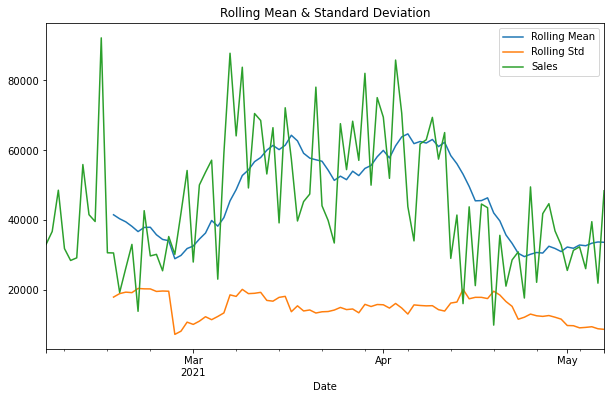

In [28]:
# plot rolling statistics
timeseries = df ['Sales']
plt.figure(figsize=(10, 6))
timeseries.rolling(12).mean().plot(label='Rolling Mean')
timeseries.rolling(12).std().plot(label='Rolling Std')
plt.title('Rolling Mean & Standard Deviation')
timeseries.plot()
plt.legend()

Visually, the trend of does not look stationary, It has a moving mean which is not constant. 

The Dickey-Fuller test (ADF) will be performed to check whether the data is stationary or not. It is used to test the null hypothesis.

In [30]:
# perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

print('Result of ADF test: ')
dftest = adfuller(df['Sales'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['ADF test statistic','p-value','# of lags used','# of observations'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)' %key]=value
    
print(dfoutput)

Result of ADF test: 
ADF test statistic      -2.188368
p-value                  0.210494
# of lags used           5.000000
# of observations       86.000000
critical value (1%)     -3.508783
critical value (5%)     -2.895784
critical value (10%)    -2.585038
dtype: float64


It is clear that the data is non-stationary, the p-value is approximately 0.21 which is far greater than 0.05  

Build a function for further use to check the stationarity of the data; determine the rolling statistics and perform the dickey-fuller test

In [31]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    # determine rolling statistics:
    movingAverage=timeseries.rolling(window=30).mean()
    movingSTD = timeseries.rolling(window=30).std()
    
    # plot rolling mean
    #plt.plot(movingAverage)
    
    # perform dickey-fuller test
    print('Result of ADF test: ')
    dftest=adfuller(timeseries['Sales'])
    dfoutput=pd.Series(dftest[0:4], index=['ADF test statistic','p-value','# of lags used','# of observations'])
    for key,value in dftest[4].items():
        dfoutput['critical value (%s)' %key]=value
    
    print(dfoutput)

Apply differencing to make the data stationary. 

In [33]:
# perform differencing on the data
dataDiffShifting = df - df.shift(1)
dataDiffShifting.dropna(inplace=True)
test_stationarity(dataDiffShifting)

Result of ADF test: 
ADF test statistic     -7.601628e+00
p-value                 2.380859e-11
# of lags used          3.000000e+00
# of observations       8.700000e+01
critical value (1%)    -3.507853e+00
critical value (5%)    -2.895382e+00
critical value (10%)   -2.584824e+00
dtype: float64


In [34]:
# perform second differencing on the original data
dataDiffShifting2 = df - df.shift(2)
dataDiffShifting2.dropna(inplace=True)
test_stationarity(dataDiffShifting2)

Result of ADF test: 
ADF test statistic      -2.482017
p-value                  0.119911
# of lags used          12.000000
# of observations       77.000000
critical value (1%)     -3.518281
critical value (5%)     -2.899878
critical value (10%)    -2.587223
dtype: float64


The p-value of the differenced data is approximately 0.12 which is an improvement from the first differencing

View the seasonality trend and residuals using ETS decomposition; it allows to observe seasonality, trend and error/remainder of a time series.

<Figure size 432x288 with 0 Axes>

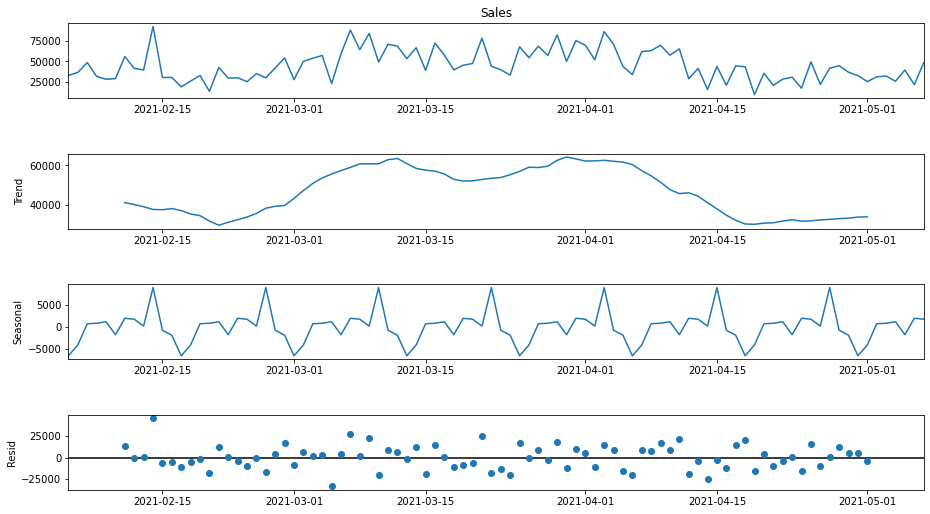

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Sales'], freq = 12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

In [36]:
# more import 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [40]:
dataDiffShifting2.drop(['Day','Month','Year'],axis=1, inplace=True)

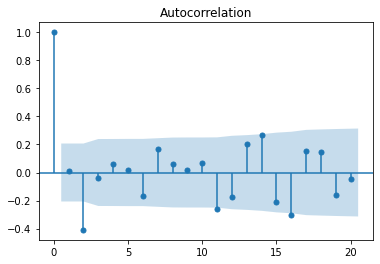

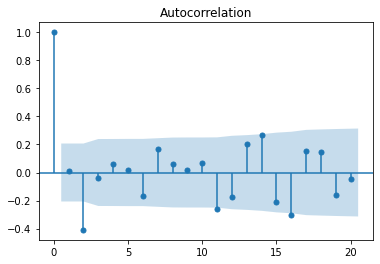

In [41]:
# plot acf to determine value q(MA)
plot_acf(dataDiffShifting2)

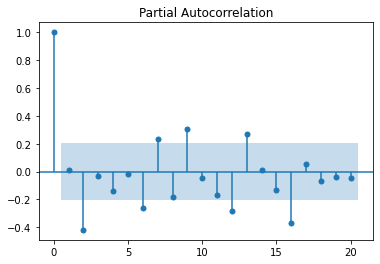

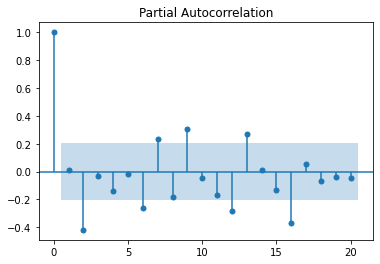

In [54]:
# plot pacf to identify the value of p(AR)
plot_pacf(dataDiffShifting2)

Seasonality of the data can not be predicted just yet hence, the use of just ARIMA model on it.

In [69]:
from statsmodels.tsa.arima_model import ARIMA
arima_model = ARIMA(df.Sales, (3,2,1)).fit()

print(arima_model.summary())

/Users/khaiyra/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/khaiyra/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:               D2.Sales   No. Observations:                   90
Model:                 ARIMA(3, 2, 1)   Log Likelihood               -1004.250
Method:                       css-mle   S.D. of innovations          16346.382
Date:                Mon, 31 May 2021   AIC                           2020.499
Time:                        17:07:22   BIC                           2035.498
Sample:                    02-07-2021   HQIC                          2026.548
                         - 05-07-2021                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -13.1599     29.101     -0.452      0.651     -70.196      43.876
ar.L1.D2.Sales    -0.7484      0.104     -7.179      0.000      -0.953      -0.544
ar.L2.D2.Sales    -0.3823      0.124

Cross-Validate   

In [84]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
tscv = TimeSeriesSplit(n_splits = 4)
rmse = []
for train_index, test_index in tscv.split(dataDiffShifting2):
    cv_train, cv_test = df.iloc[train_index], df.iloc[test_index]
    
    arma = sm.tsa.ARMA(cv_train, order=(3,2,3)).fit(disp=False)
    
    predictions = arma.predict(cv_test.index.values[0], cv_test.index.values[-1])
    true_values = cv_test.values
    rmse.append(sqrt(mean_squared_error(true_values, predictions)))
    
print("RMSE: {}".format(np.mean(rmse)))

/Users/khaiyra/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ValueError: endog is required to have ndim 1 but has ndim 2

Forecast Predictions for a year

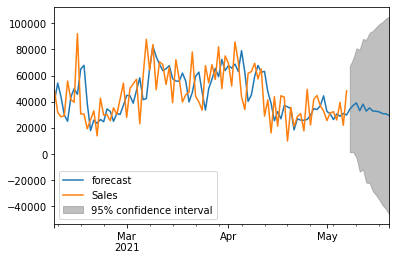

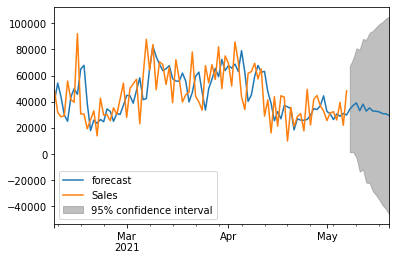

In [47]:
arima_model.plot_predict(2,104)

In [48]:
# forecast for a year
arima_model.forecast(steps=12)

(array([34401.73617032, 37171.10677502, 39172.26254024, 33213.37906857,
        38167.97116094, 32870.21723854, 35309.57310486, 32921.22897384,
        32776.33536982, 32193.29250085, 30962.76925321, 30787.83390355]),
 array([16847.479419  , 18114.3406705 , 21293.04910022, 23787.5740857 ,
        25422.67933562, 27880.77060083, 29308.66860459, 31273.69349127,
        32746.63288612, 34329.24751892, 35800.26368585, 37180.25484245]),
 array([[  1381.2832788 ,  67422.18906183],
        [  1667.65145715,  72674.56209288],
        [ -2561.34681724,  80905.87189772],
        [-13409.40941897,  79836.16755612],
        [-11659.56472739,  87995.50704927],
        [-21775.08900032,  87515.52347739],
        [-22134.36179496,  92753.50800468],
        [-28374.0839326 ,  94216.54188029],
        [-31405.88570194,  96958.55644157],
        [-35090.79625259,  99477.38125428],
        [-39204.4582081 , 101129.99671452],
        [-42084.12652368, 103659.79433078]]))